# <span style="color:blue"> Esercitazione 5 - Campionamento di una pdf con algoritmo di Metropolis </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 5.1 - Campionamento di distribuzioni di probabilità associate a funzioni d'onda con algoritmo di Metropolis](#Esercizio5.1)

In [76]:
import numpy as np
import matplotlib.pyplot as plt

## <span id="Esercizio5.1" style="color:blue">  Esercizio 5.1 - Campionamento di distribuzioni di probabilità associate a funzioni d'onda con algoritmo di Metropolis </span>[^](#toc)

### 0. Generalità

#### Le distribuzioni da campionare

In questo esercizio sono stati eseguiti i campionamenti di due distribuzioni di probabilità associate a due autofunzioni dell'atomo di idrogeno.

Una funzione d'onda, in questo contesto, è indicata con $\Psi(\vec{r},t)$, dove $\vec{r}$ è la posizione dell'elettrone e $t$ l'istante di tempo. Essa descrive lo stato dell'elettrone, e il suo modulo quadro $|\Psi(\vec{r},t)|^2$ rappresenta la distribuzione di probabilità che la particella si trovi nella posizione $\vec{r}$ al tempo $t$.

Le parti spaziali delle autofunzioni stazionarie dell'atomo di idrogeno - se l'elettrone è considerato senza spin - sono indicate, in coordinate sferiche, con $\Psi_{n,l,m}(r,\theta,\phi)$, dove
- $n=1,2,...$ è il numero quantico principale
- $l=0,1, ..., n-1$ è il numero quantico azimutale
- $m=-l, -l+1, ..., l-1, l$ è il numero quantico magnetico.

Sono state considerate
- La funzione d'onda del ground state:
$$\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $$
  la cui distribuzione di probabilità associata è
$$|\Psi_{1,0,0}(r,\theta,\phi)|^2=|\Psi_{1,0,0}(r)|^2=\frac{1}{\pi a_0^3} e^{-2r/a_0} $$
- La funzione d'onda di uno dei tre stati eccitati $2p$:
$$\Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) $$
  con distribuzione di probabilità associata
$$|\Psi_{2,1,0}(r,\theta,\phi)|^2=|\Psi_{2,1,0}(r,\theta)|^2=\frac{1}{32\pi a_0^5} r^2 e^{-r/a_0} \cos^2(\theta) $$

La quantità $a_0$ è il raggio di Bohr:
$a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm

Le distribuzioni di probabilità sono state campionate in coordinate cartesiane. Scrivendole quindi in termini di $x$, $y$ e $z$, esse diventano
$$|\Psi_{1,0,0}(x,y,z)|^2=\frac{1}{\pi a_0^3} e^{-2\frac{\sqrt{x^2+y^2+z^2}}{a_0}} \quad \mathrm{e} \quad |\Psi_{2,1,0}(x,y,z)|^2=\frac{1}{32\pi a_0^5} z^2 e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}}$$

I valori medi del raggio $r$ per le due autofunzioni sono, rispettivamente, $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$.

#### L'algoritmo di Metropolis

L’algoritmo di Metropolis è definito da:

**Inizializzazione**:
- Scelta del punto iniziale: si sceglie un punto iniziale $\vec{r}_0$ in una regione in cui la distribuzione da campionare $\rho(\vec{r})$ assume un valore non trascurabile, in modo da ridurre il tempo di equilibrazione.
- Scelta della transition probability: si introduce una distribuzione di proposta $T(\vec{r}'|\vec{r})$, che permette di generare un punto candidato $\vec{r}'$ a partire dal punto corrente $\vec{r}_{n-1}$​. Nel presente esercizio sono state considerate due scelte:
  - **Proposal uniforme**:
          
    Al passo $n$, si genera $\vec{r}'=(x',y',z')$ con$$
x' = x_{n-1} + \delta x, \qquad
y' = y_{n-1} + \delta y, \qquad
z' = z_{n-1} + \delta z,$$

    dove $\delta x, \delta y, \delta z \sim U([-a,a))$ sono indipendenti. In pratica, si genera un punto estratto da un cubo di lato $2a$ centrato nel punto corrente, con coordinate estratte da distribuzioni uniformi lungo il rispettivo lato del cubo. Si genera quindi un punto estratto da un cubo di lato $2a$ centrato nel punto corrente. L’implementazione utilizza tre estrazioni indipendenti tramite l’algoritmo RANNYU.

    La transition probability è uniforme nel cubo $C_{n-1}$ di lato $2a$ centrato in $\vec{r}_{n-1}$:$$
T(\vec r' \mid \vec r_{n-1}) =
\begin{cases}
\dfrac{1}{(2a)^3} & \text{se } \vec{r}' \in C_{n-1} \\
0 & \text{altrimenti}
\end{cases}
$$

  - **Proposal gaussiana isotropa**:
     
    In questo caso, $\delta x, \delta y, \delta z \sim \mathcal N(0,\sigma^2)$ (e indipendenti). Si genera quindi un punto estratto da una gaussiana isotropa di varianza $\sigma^2$ centrata nel punto corrente. Le variabili gaussiane sono generate tramite trasformazione di Box–Muller a partire dal LCG.

    In questo caso $$T(\vec r' \mid \vec r_{n-1}) =\frac{1}{(2\pi \sigma^2)^{3/2}}\exp{\left(-\frac{|\vec{r}'-\vec{r}_{n-1}|^2}{2\sigma^2}\right)}$$

**Regola di accettazione**
- Dato il punto proposto $\vec{r}'$, si calcola la probabilità di accettazione
$$\alpha=\min\left(1,\frac{T(\vec r_{n-1}\mid \vec r')\,\rho(\vec r')}{T(\vec r'\mid \vec r_{n-1})\,\rho(\vec r_{n-1})}\right)$$  Nel caso di transition probability simmetriche, vale $T(\vec{r}'|\vec{r})=T(\vec{r}|\vec{r}')$, e quindi
$$\alpha=\min\left(1,\frac{\rho(\vec r')}{\rho(\vec r_{n-1})}\right)$$
  
  Le due scelte implementate (uniforme centrata e gaussiana isotropa centrata) sono entrambe simmetriche, per cui si utilizza l’espressione semplificata.
- Si accetta il punto $\vec{r}'$ con probabilità $\alpha$: si genera un numero pseudo-casuale $u \sim U([0,1))$, e
    - se $u \leq \alpha$, $\vec{r}'$ il nuovo punto della sequenza $\vec{r}_n=\vec{r}'$ (_acceptance_)
    - se $u > \alpha$, $\vec{r}'$ il nuovo punto della sequenza è quello attuale, ovvero $\vec{r}_n=\vec{r}_{n-1}$ (_rejection_)
 
Dopo un numero sufficientemente elevato di iterazioni (fase di equilibrazione), la sequenza di punti generata può essere considerata campionata dalla distribuzione desiderata $\rho(\vec{r})$. 

### i. Campionamento con transition probability uniforme

#### Descrizione

**Stato 1s**
- La distribuzione campionata è
$$\rho(\vec{r})=|\Psi_{1,0,0}(x,y,z)|^2=\frac{1}{\pi} e^{-2\sqrt{x^2+y^2+z^2}}$$
  Si noti che non è più presente $a_0$ poiché nel codice sono state utilizzate le coordinate ridotte ($a_0=1$). Si ha dunque  $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}$.
- La probabilità di accettazione è data da
$$\alpha=\min\left(1,e^{2(r_{n-1}-r')}\right)$$
- É stato scelto come punto di inizio l'origine $\vec{r}_0=0$.

**Stato 2p**
- La distribuzione campionata è
$$\rho(\vec{r})=|\Psi_{2,1,0}(x,y,z)|^2=\frac{1}{32\pi} z^2 e^{-\sqrt{x^2+y^2+z^2}}$$
  Dove è stato posto $a_0=1$. Si ha  $=\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5$.
- La probabilità di accettazione è data da
$$\alpha=\min\left(1,\left( \frac{z'}{z_{n-1}} \right)^2 e^{r_{n-1}-r'}\right)$$
- È stato scelto come punto iniziale $\vec r_0 = (0,0,1)$, poiché $\rho$ è proporzionale a $z^2$ e si annulla all’origine.


#### Calcolo e risultati

É stata eseguita una simulazione di prova, con $M=2000$ campionamenti delle due $\rho(\vec{r})$. I valori $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ sono stati calcolati con la tecnica della media a blocchi, con $N=2000$ blocchi ($1$ dato per blocco). In questo modo è stato possibile capire se ci fosse un trend iniziale nei dati ottenuti, ad indicare la necessità di attendere alcuni step della simulazione affiché essa si equilibri.

Sono stati inoltre scelti dei cubi di lati $a=1.2$ e $a=3$ per la transition probability, i quali hanno portato ad un _acceptance rate_, rispettivamente, del $52$% e del $51$% (valori ottimali).

Di seguito si mostrano gli andamenti delle medie in ciascun blocco - ovvero gli andamenti dei primi $2000$ valori di $r$ generati campionando la distribuzione.

_Nota_: i files di output sono stati rinominati, in modo da rimanere sempre a disposizione

In [551]:
# Load the data (uniform transition probability)
# Notation: "r1s_unif"=value of r obtained with uniform transition probability, for 1s state
#           "r2p_unif"=value of r obtained with uniform transition probability, for 2p state
Path="../Es05_01/Output/results_unif_trial.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_unifBlock,                # Block averages <r>: r1s_unifBlock[i]=<r> estimated in i-th block
    r1s_unifMeanValueProg,        # Progressive averages avg<r>: r1s_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_unifStDevOfTheMeanProg[i]=uncertainty of r1s_unifMeanValueProg[i]
    r2p_unifBlock,                # Block averages <r>: r2p_unifBlock[i]=<r> estimated in i-th block
    r2p_unifMeanValueProg,        # Progressive averages avg<r>: r2p_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_unifStDevOfTheMeanProg[i]=uncertainty of r2p_unifMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

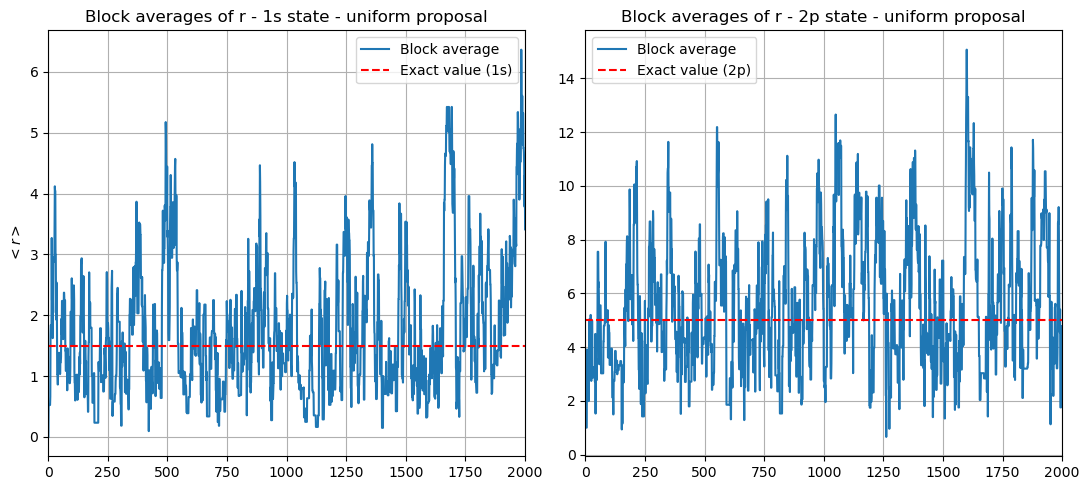

In [553]:
k=1   # plot one point every k blocks
fig,axes=plt.subplots(1,2,figsize=(11,5),sharex=True)
# 1s - uniform
axes[0].plot(BlockNumber[::k],r1s_unifBlock[::k],linestyle='-',label='Block average')
axes[0].axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
axes[0].set_title('Block averages of r - 1s state - uniform proposal')
axes[0].set_ylabel(r'$<r>$')
axes[0].grid(True)
axes[0].legend()
# 2p - uniform
axes[1].plot(BlockNumber[::k],r2p_unifBlock[::k],linestyle='-',label='Block average')
axes[1].axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
axes[1].set_title('Block averages of r - 2p state - uniform proposal')
axes[1].grid(True)
axes[1].legend()
# Plot
plt.xlim(0,BlockNumber[-1])
plt.tight_layout()
plt.show()

Non si osserva nessun trend iniziale, in nessuno dei due casi. Si deduce quindi che il tempo di equilibrazione è trascurabile.

É stata quindi eseguita una simulazione con stessi valori di $a$ e punti di partenza, con $M=10^7$ e $N=10^4$. Di seguito si riportano i risultati:

In [563]:
# Load the data (uniform transition probability) - again
Path="../Es05_01/Output/results_unif.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_unifBlock,                # Block averages <r>: r1s_unifBlock[i]=<r> estimated in i-th block
    r1s_unifMeanValueProg,        # Progressive averages avg<r>: r1s_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_unifStDevOfTheMeanProg[i]=uncertainty of r1s_unifMeanValueProg[i]
    r2p_unifBlock,                # Block averages <r>: r2p_unifBlock[i]=<r> estimated in i-th block
    r2p_unifMeanValueProg,        # Progressive averages avg<r>: r2p_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_unifStDevOfTheMeanProg[i]=uncertainty of r2p_unifMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

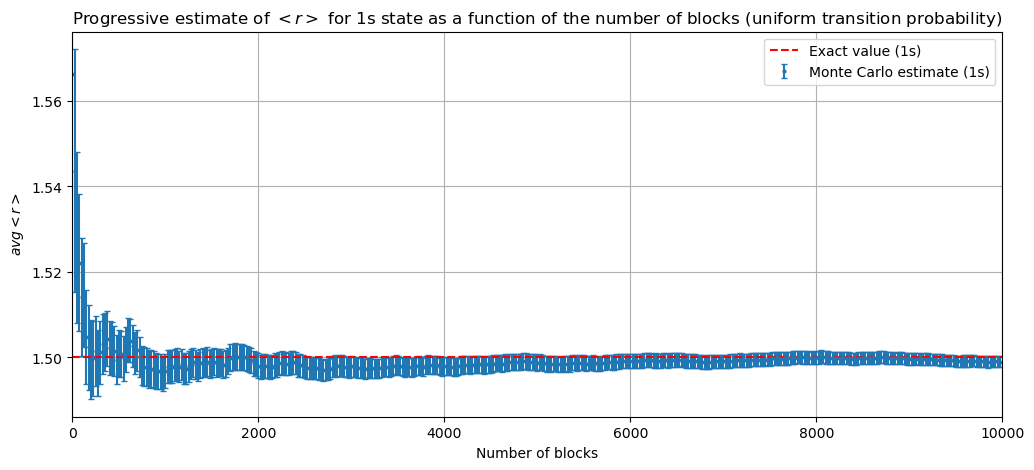

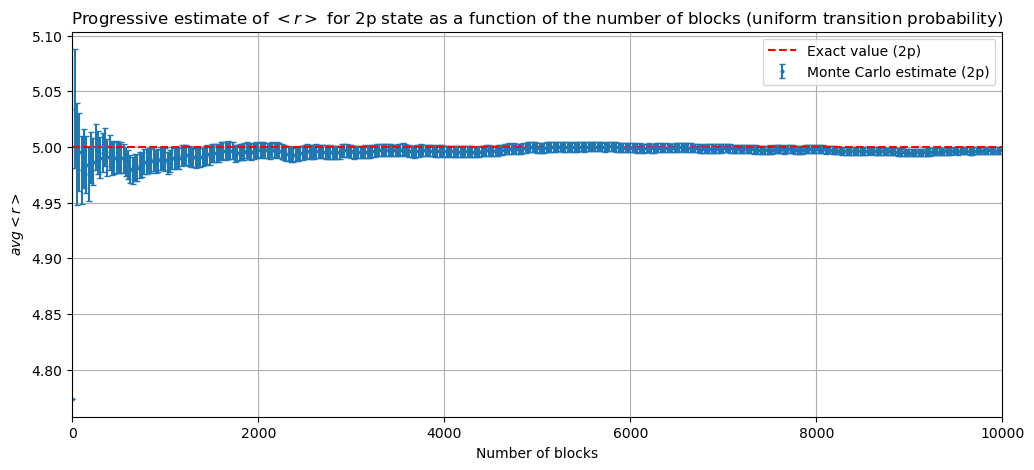

In [565]:
# Plot the progressive average
k=25  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(BlockNumber[::k],r1s_unifMeanValueProg[::k],yerr=r1s_unifStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate (1s)')
plt.axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
plt.title('Progressive estimate of $<r>$ for 1s state as a function of the number of blocks (uniform transition probability)')
plt.xlabel('Number of blocks')
plt.ylabel(r'$avg<r>$')
plt.xlim(0,BlockNumber[-1])
plt.ylim()
plt.legend()
plt.grid(True)
plt.show()

# Plot the progressive average
k=25  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(BlockNumber[::k],r2p_unifMeanValueProg[::k],yerr=r2p_unifStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate (2p)')
plt.axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
plt.title('Progressive estimate of $<r>$ for 2p state as a function of the number of blocks (uniform transition probability)')
plt.xlabel('Number of blocks')
plt.ylabel(r'$avg<r>$')
plt.xlim(0,BlockNumber[-1])
plt.ylim()
plt.legend()
plt.grid(True)
plt.show()

- L'acceptance rate ottenuto è del $51$% per lo stato 1s e del $50$% per lo stato 2p. I valori sono ottimali.
- In entrambi i casi, la media progressiva e l'incertezza statistica progressiva seguono il comportamento atteso (per maggiori dettagli, si veda l'_Esercizio 1.1_, in particolare la spiegazione sulla media a blocchi e la digressione sulla sua connessione al CLT)

I risultati finali del calcolo sono

In [567]:
print(f"<r> for the 1s state: {r1s_unifMeanValueProg[-1]:.4f}±{r1s_unifStDevOfTheMeanProg[-1]:.4f}")
print(f"<r> for the 2p state: {r2p_unifMeanValueProg[-1]:.4f}±{r2p_unifStDevOfTheMeanProg[-1]:.4f}")

<r> for the 1s state: 1.4990±0.0013
<r> for the 2p state: 4.9969±0.0032


Essi risultano pienamente compatibili con i valori attesi:

In [569]:
z_1s=np.abs(r1s_unifMeanValueProg[-1]-1.5)/r1s_unifStDevOfTheMeanProg[-1]
z_2p=np.abs(r2p_unifMeanValueProg[-1]-5.0)/r2p_unifStDevOfTheMeanProg[-1]
print(f"Z-value for the 1s state: {z_1s:.2f}")
print(f"Z-value for the 1s state: {z_2p:.2f}")

Z-value for the 1s state: 0.76
Z-value for the 1s state: 0.98


In entrambi i casi, la compatibilità è entro $1\sigma$.

### ii. Campionamento con transition probability gaussiana (isotropa)

#### Descrizione

I calcoli sono stati condotti allo stesso modo di quelli con la transition probability uniforme nelle $3$ direzioni. L'unica differenza risiede nel meccanismo con cui il punto "nuovo" della sequenza viene generato e proposto. I punti di partenza dell'algoritmo sono gli stessi scelti nel caso precedente. 

#### Calcolo e risultati

Anche in questo caso, è stata condotta una simulazione di prova per controllare se fosse necessario equilibrare la simulazione prima di prendere i dati per il calcolo dei valori medi. Sono stati utilizzati gli stessi parametri usati per il caso precedente.

Le deviazioni standard della transition probability sono stati posti uguali a $\sigma=0.75$ e $\sigma=1.9$. Gli _acceptance rate_ ottenuti sono, rispettivamente, il $49$% e del $50$%.

Di seguito si mostrano gli andamenti delle medie in ciascun blocco - ovvero gli andamenti dei primi $2000$ valori di $r$ generati campionando la distribuzione.

_Nota_: i files di output sono stati rinominati, in modo da rimanere sempre a disposizione

In [571]:
# Load the data (Gaussian transition probability)
# Notation: "r1s_gaus"=value of r obtained with Gaussian transition probability, for 1s state
#           "r2p_gaus"=value of r obtained with Gaussian transition probability, for 2p state
Path="../Es05_01/Output/results_gaus_trial.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_gausBlock,                # Block averages <r>: r1s_gausBlock[i]=<r> estimated in i-th block
    r1s_gausMeanValueProg,        # Progressive averages avg<r>: r1s_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_gausStDevOfTheMeanProg[i]=uncertainty of r1s_gausMeanValueProg[i]
    r2p_gausBlock,                # Block averages <r>: r2p_gausBlock[i]=<r> estimated in i-th block
    r2p_gausMeanValueProg,        # Progressive averages avg<r>: r2p_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_gausStDevOfTheMeanProg[i]=uncertainty of r2p_gausMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

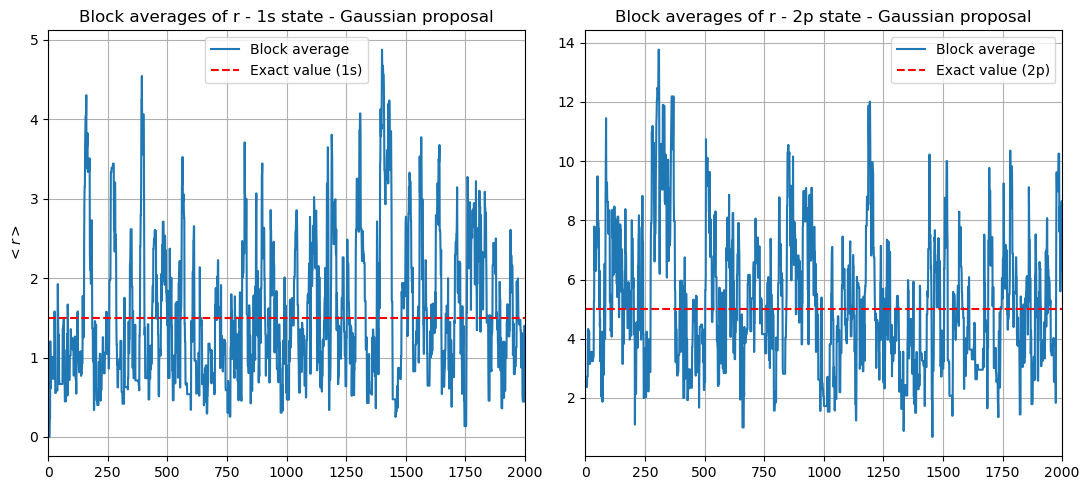

In [573]:
k=1   # plot one point every k blocks
fig,axes=plt.subplots(1,2,figsize=(11,5),sharex=True)
# 1s - uniform
axes[0].plot(BlockNumber[::k],r1s_gausBlock[::k],linestyle='-',label='Block average')
axes[0].axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
axes[0].set_title('Block averages of r - 1s state - Gaussian proposal')
axes[0].set_ylabel(r'$<r>$')
axes[0].grid(True)
axes[0].legend()
# 2p - uniform
axes[1].plot(BlockNumber[::k],r2p_gausBlock[::k],linestyle='-',label='Block average')
axes[1].axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
axes[1].set_title('Block averages of r - 2p state - Gaussian proposal')
axes[1].grid(True)
axes[1].legend()
# Plot
plt.xlim(0,BlockNumber[-1])
plt.tight_layout()
plt.show()

Neanche in questo caso si osservano trend iniziali. Il tempo di equilibrazione risulta quindi trascurabile.

É stata eseguita una simulazione con stessi valori di $\sigma$ e punti di partenza, con $M=10^7$ e $N=10^4$. Di seguito si riportano i risultati:

In [575]:
# Load the data (Gaussian transition probability) - again
Path="../Es05_01/Output/results_gaus.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_gausBlock,                # Block averages <r>: r1s_gausBlock[i]=<r> estimated in i-th block
    r1s_gausMeanValueProg,        # Progressive averages avg<r>: r1s_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_gausStDevOfTheMeanProg[i]=uncertainty of r1s_gausMeanValueProg[i]
    r2p_gausBlock,                # Block averages <r>: r2p_gausBlock[i]=<r> estimated in i-th block
    r2p_gausMeanValueProg,        # Progressive averages avg<r>: r2p_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_gausStDevOfTheMeanProg[i]=uncertainty of r2p_gausMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

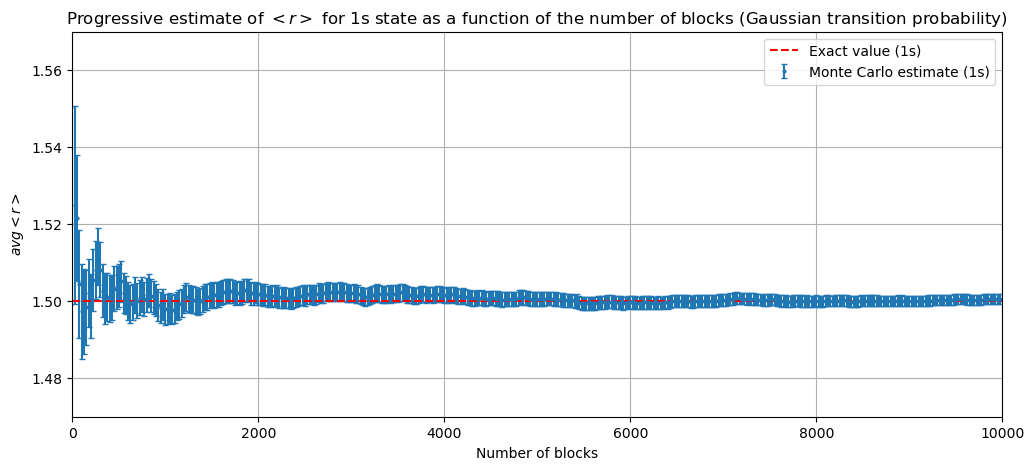

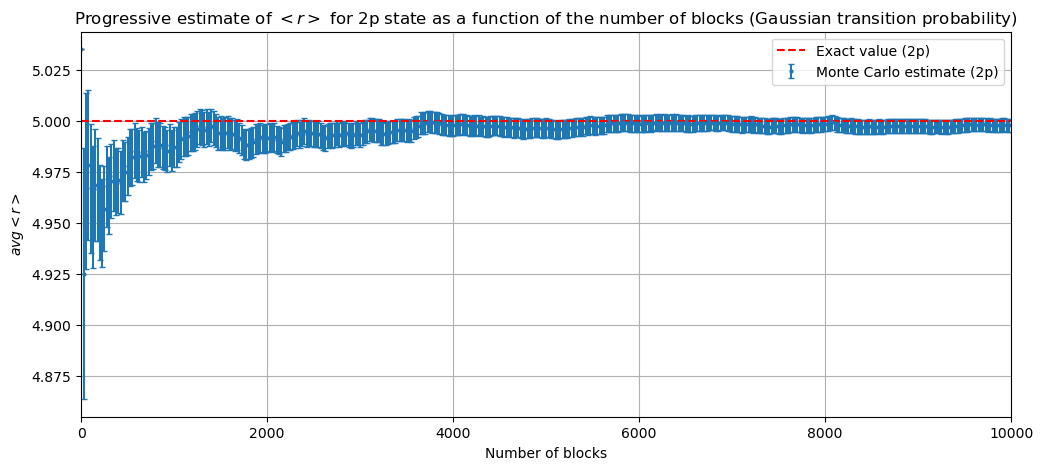

In [577]:
# Plot the progressive average
k=25  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(BlockNumber[::k],r1s_gausMeanValueProg[::k],yerr=r1s_gausStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate (1s)')
plt.axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
plt.title('Progressive estimate of $<r>$ for 1s state as a function of the number of blocks (Gaussian transition probability)')
plt.xlabel('Number of blocks')
plt.ylabel(r'$avg<r>$')
plt.xlim(0,BlockNumber[-1])
plt.ylim(1.47,1.57)
plt.legend()
plt.grid(True)
plt.show()

# Plot the progressive average
k=25  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(BlockNumber[::k],r2p_gausMeanValueProg[::k],yerr=r2p_gausStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate (2p)')
plt.axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
plt.title('Progressive estimate of $<r>$ for 2p state as a function of the number of blocks (Gaussian transition probability)')
plt.xlabel('Number of blocks')
plt.ylabel(r'$avg<r>$')
plt.xlim(0,BlockNumber[-1])
plt.ylim()
plt.legend()
plt.grid(True)
plt.show()

- L'acceptance rate ottenuto è del $51$% per lo stato 1s e del $50$% per lo stato 2p. I valori sono ottimali.
- In entrambi i casi, la media progressiva e l'incertezza statistica progressiva seguono il comportamento atteso.

I risultati finali del calcolo sono

In [579]:
print(f"<r> for the 1s state: {r1s_gausMeanValueProg[-1]:.4f}±{r1s_gausStDevOfTheMeanProg[-1]:.4f}")
print(f"<r> for the 2p state: {r2p_gausMeanValueProg[-1]:.4f}±{r2p_gausStDevOfTheMeanProg[-1]:.4f}")

<r> for the 1s state: 1.5006±0.0013
<r> for the 2p state: 4.9978±0.0032


Essi risultano pienamente compatibili con i valori attesi:

In [581]:
z_1s=np.abs(r1s_gausMeanValueProg[-1]-1.5)/r1s_gausStDevOfTheMeanProg[-1]
z_2p=np.abs(r2p_gausMeanValueProg[-1]-5.0)/r2p_gausStDevOfTheMeanProg[-1]
print(f"Z-value for the 1s state: {z_1s:.2f}")
print(f"Z-value for the 1s state: {z_2p:.2f}")

Z-value for the 1s state: 0.44
Z-value for the 1s state: 0.68


In entrambi i casi, la compatibilità è entro $1\sigma$.

### iii. Confronto

Per entrambi i metodi di _proposal_ implementati, i risultati ottenuti sono positivi:
- con i valori scelti di $a$, $\sigma$ e $\vec{r}_0$, l'equilibrazione è risultata istantanea e l'acceptance rate si è mantenuto molto vicino al $50$%;
- i valori medi $<r>$ ottenuti sono in accordo statistico con i rispettivi valori teorici, a dimostrazione della correttezza del campionamento delle due distribuzioni;
- i valori di $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ ottenuti nei due diversi modi sono tra loro compatibili, e non si osservano differenze nell'andamento delle rispettive medie progressive e incertezze progressive. I due metodi implementati non mostrano sostanziali differenze, né qualità, né nell'efficienza del campionamento.


Si è provato inoltre ad eseguire i campionamenti partendo da punti in cui le $\rho$ hanno valori molto bassi. Per ciascun caso, è stato scelto il punto $\vec{r}_0=(0,0,20)$. Di seguito si mostrano i risultati per $M=2000$ e $N=2000$. 

In [583]:
# Load the data (uniform transition probability) - again
Path="../Es05_01/Output/results_unif_20.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_unifBlock,                # Block averages <r>: r1s_unifBlock[i]=<r> estimated in i-th block
    r1s_unifMeanValueProg,        # Progressive averages avg<r>: r1s_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_unifStDevOfTheMeanProg[i]=uncertainty of r1s_unifMeanValueProg[i]
    r2p_unifBlock,                # Block averages <r>: r2p_unifBlock[i]=<r> estimated in i-th block
    r2p_unifMeanValueProg,        # Progressive averages avg<r>: r2p_unifMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_unifStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_unifStDevOfTheMeanProg[i]=uncertainty of r2p_unifMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

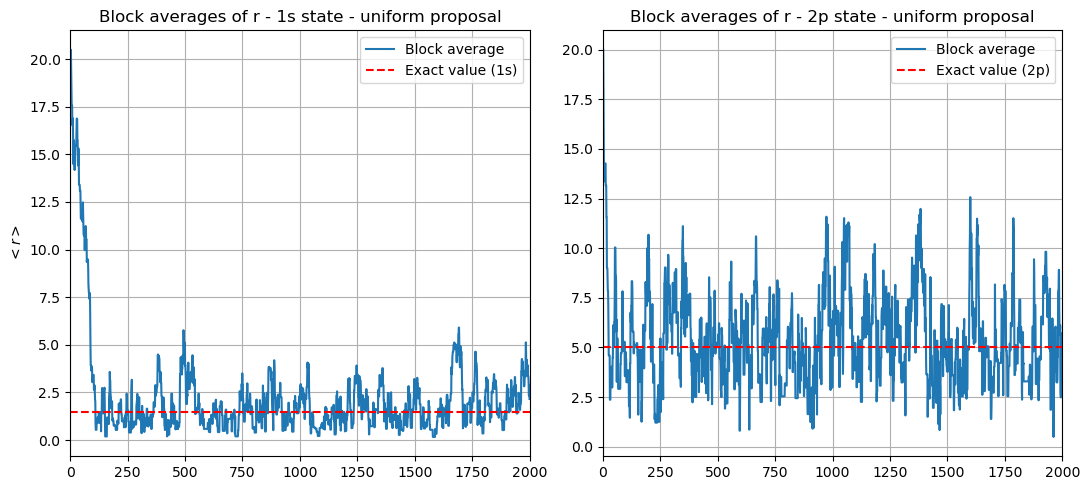

In [585]:
k=1   # plot one point every k blocks
fig,axes=plt.subplots(1,2,figsize=(11,5),sharex=True)
# 1s - uniform
axes[0].plot(BlockNumber[::k],r1s_unifBlock[::k],linestyle='-',label='Block average')
axes[0].axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
axes[0].set_title('Block averages of r - 1s state - uniform proposal')
axes[0].set_ylabel(r'$<r>$')
axes[0].grid(True)
axes[0].legend()
# 2p - uniform
axes[1].plot(BlockNumber[::k],r2p_unifBlock[::k],linestyle='-',label='Block average')
axes[1].axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
axes[1].set_title('Block averages of r - 2p state - uniform proposal')
axes[1].grid(True)
axes[1].legend()
# Plot
plt.xlim(0,BlockNumber[-1])
plt.tight_layout()
plt.show()

In [587]:
# Load the data (Gaussian transition probability)
# Notation: "r1s_gaus"=value of r obtained with Gaussian transition probability, for 1s state
#           "r2p_gaus"=value of r obtained with Gaussian transition probability, for 2p state
Path="../Es05_01/Output/results_gaus_20.dat"
(
    BlockNumber,                  # Block indexes (1-N)
    r1s_gausBlock,                # Block averages <r>: r1s_gausBlock[i]=<r> estimated in i-th block
    r1s_gausMeanValueProg,        # Progressive averages avg<r>: r1s_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r1s_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r1s_gausStDevOfTheMeanProg[i]=uncertainty of r1s_gausMeanValueProg[i]
    r2p_gausBlock,                # Block averages <r>: r2p_gausBlock[i]=<r> estimated in i-th block
    r2p_gausMeanValueProg,        # Progressive averages avg<r>: r2p_gausMeanValueProg[i]=avg<r> estimated over the first (i+1) blocks
    r2p_gausStDevOfTheMeanProg,   # Progressive statistical uncertainty of avg<r>: r2p_gausStDevOfTheMeanProg[i]=uncertainty of r2p_gausMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3,4,5,6),unpack=True)

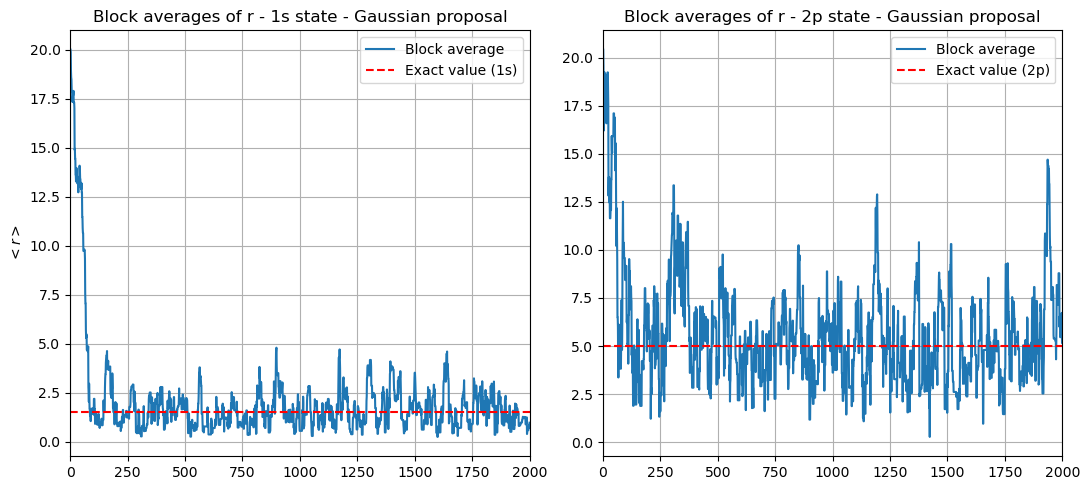

In [589]:
k=1   # plot one point every k blocks
fig,axes=plt.subplots(1,2,figsize=(11,5),sharex=True)
# 1s - uniform
axes[0].plot(BlockNumber[::k],r1s_gausBlock[::k],linestyle='-',label='Block average')
axes[0].axhline(1.5,color='r',linestyle='--',label='Exact value (1s)')
axes[0].set_title('Block averages of r - 1s state - Gaussian proposal')
axes[0].set_ylabel(r'$<r>$')
axes[0].grid(True)
axes[0].legend()
# 2p - uniform
axes[1].plot(BlockNumber[::k],r2p_gausBlock[::k],linestyle='-',label='Block average')
axes[1].axhline(5.0,color='r',linestyle='--',label='Exact value (2p)')
axes[1].set_title('Block averages of r - 2p state - Gaussian proposal')
axes[1].grid(True)
axes[1].legend()
# Plot
plt.xlim(0,BlockNumber[-1])
plt.tight_layout()
plt.show()

Si osserva chiaramente che, in questo caso, sarebbe necessario attendere alcuni step per l'equilibrazione. Nel caso peggiore, è richiesto di attendere circa $150$ step. Questo è dovuto al fatto che è necessario del tempo affinché la catena di Markov generata dal campionamento si porti all'interno della regione con maggior densità di probabilità.